# Многослойная нейронная сеть

Задача обучения "девочки"

In [1]:
%%capture
%pip install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


Структура многослойной сети

In [7]:
model = Sequential()
model.add(Dense(2, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Сборка сети

In [8]:
model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])

Обучающая выборка

In [12]:
train_x = np.array([
    [+1, +1, +1], # [1] +квартира, +красивый, +любит рок
    [+1, -1, +1], # [1]
    [-1, +1, -1], # [0]
    [-1, -1, -1], # [0]
])
train_y = np.array([
    1, 
    1, 
    0, 
    0,
])

Обучение

In [13]:
log = model.fit(train_x, train_y, epochs=100, verbose=0)

Ошибка обучения

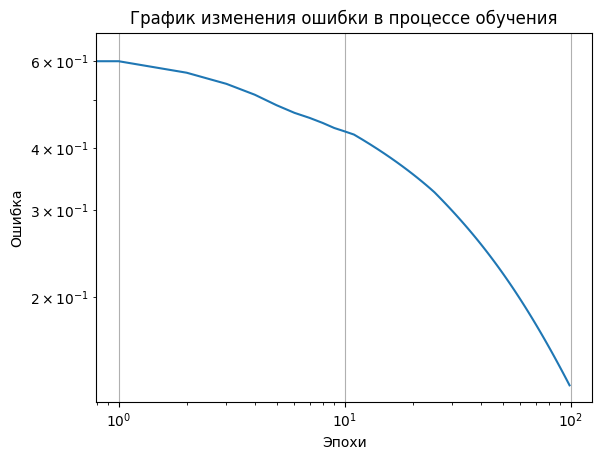

In [17]:
plt.plot(log.history['loss'])
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Использование сети

In [21]:
prediction = (model.predict(train_x) > 0.5).astype(int)
print("Предсказание (1 - подходит; 0 - не подходит)")
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Предсказание (1 - подходит; 0 - не подходит)
[[1]
 [1]
 [0]
 [0]]


Структура сети

In [25]:
for i, layer in enumerate(model.layers):
    W, O = layer.get_weights()
    print(f"Слой {i + 1} - Веса    :\n{W}")
    print(f"Слой {i + 1} - Смещение:\n{O}\n")

Слой 1 - Веса    :
[[ 0.91209024  1.2417443 ]
 [ 0.94951147 -0.5479893 ]
 [ 0.459346    0.16779017]]
Слой 1 - Смещение:
[0.17250639 0.4358406 ]

Слой 2 - Веса    :
[[1.1661644]
 [1.7787768]]
Слой 2 - Смещение:
[-1.3018217]

